In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set()

In [2]:
train_data = pd.read_csv(r'train data.csv')

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Checking the data-types of each feature: 

In [4]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Unique values :

In [6]:
print('Unique Values in each feature:\n')
print(train_data['Gender'].value_counts())
print(train_data['Married'].value_counts())
print(train_data['Dependents'].value_counts())
print(train_data['Self_Employed'].value_counts())
print(train_data['LoanAmount'].value_counts())
print(train_data['Loan_Amount_Term'].value_counts())
print(train_data['Credit_History'].value_counts())
print(train_data['Education'].value_counts())

Unique Values in each feature:

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


## Visualizing the Data:

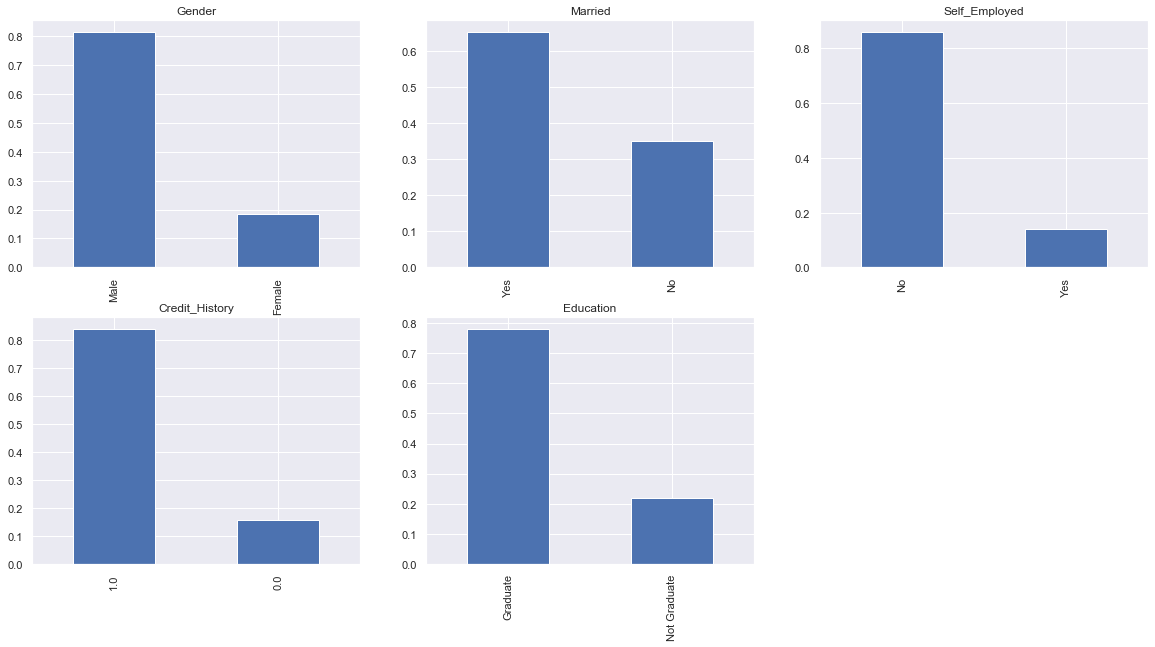

In [7]:
plt.subplot(231)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
train_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

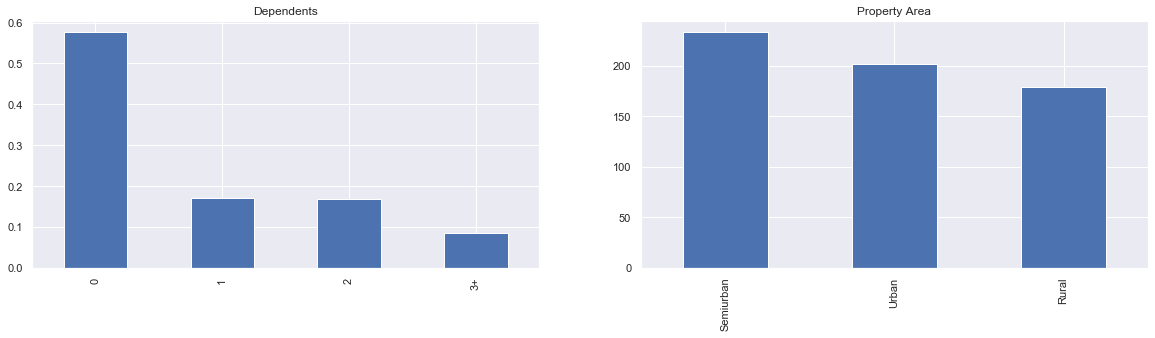

In [8]:
plt.subplot(221)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')

plt.subplot(222)
train_data['Property_Area'].value_counts().plot.bar(title='Property Area')

plt.show()

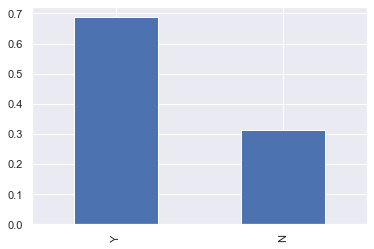

In [9]:
train_data['Loan_Status'].value_counts(normalize=True).plot.bar()

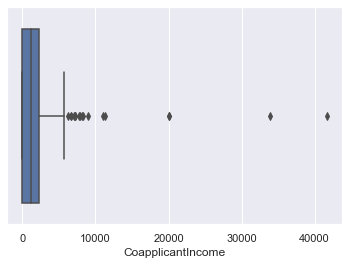

In [10]:
sns.boxplot(train_data['CoapplicantIncome'])

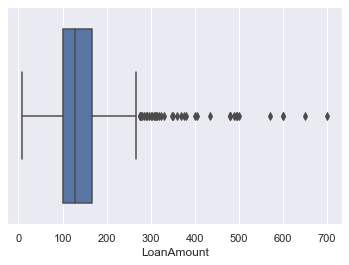

In [11]:
sns.boxplot(train_data['LoanAmount'])

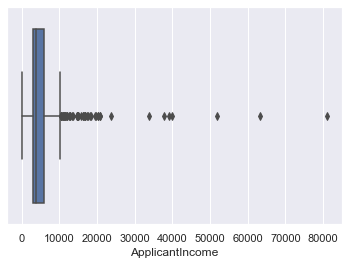

In [12]:
sns.boxplot(train_data['ApplicantIncome'])

### Dealing with null values in numerical features: 

In [13]:
# Replacing null featutes with mean or mode values:

In [14]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
train_data['Dependents'] = train_data['Dependents'].replace(np.nan,0)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(np.nan,'No')
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].dropna().mode().values[0])
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].dropna().mode().values[0])
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].dropna().mode().values[0])

In [16]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Let's deal with  the remaining two features:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(),inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace= True)

In [18]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### We have successfully removed the null values from our dataset!

In [19]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
# Mapping our Featues: 
train_data['Married_col']  = train_data['Married'].map({'Yes':1,'No':0})

train_data['Gender_col'] = train_data['Gender'].map({'Male':1,'Female':0})

train_data['Education_col'] = train_data['Education'].map({'Graduate':1,'Not Graduate':0})

train_data['Employment_status'] = train_data['Self_Employed'].map({'Yes':1,'No':0})

train_data['Area_selection'] = train_data['Property_Area'].map({'Urban':1,'Semiurban':2,'Rural':3})

train_data['Dependent_col'] =train_data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

train_data['Loan_col']  = train_data['Loan_Status'].map({'Y':1,'N':0})

In [22]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_col,Gender_col,Education_col,Employment_status,Area_selection,Dependent_col,Loan_col
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,0,1,1,0,1,0.0,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,0,3,1.0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,1,0.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,0,1,0.0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,1,0,1,0.0,1


In [64]:
# Import ML libraries from scikit-learn: 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [65]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Married_col', 'Gender_col', 'Education_col', 'Employment_status',
       'Area_selection', 'Dependent_col', 'Loan_col'],
      dtype='object')

In [74]:
# Depedent and Independent variables: 
x = train_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       'Married_col', 'Gender_col', 'Education_col', 'Employment_status',
       'Area_selection']].values

y = train_data[['Loan_col']].values


In [75]:
# train - test- split: 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 0)

In [76]:
randomforest_model  = RandomForestClassifier()

In [77]:
randomforest_model.fit(x_train, y_train)

<ipython-input-77-1529533bd04c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomforest_model.fit(x_train, y_train)


RandomForestClassifier()

In [79]:
randomforest_model.score(x_train, y_train)

1.0

In [80]:
model2 = LogisticRegression()
model2

LogisticRegression()

In [81]:
model2.fit(x_train, y_train)

c:\users\anktr\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [88]:
logistc= model2.score(x_test, y_test)
logistc

0.8324324324324325

In [84]:
model3= DecisionTreeClassifier()
model3

DecisionTreeClassifier()

In [85]:
model3.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
model3.score(x_test,y_test)

0.7297297297297297

In [89]:
print('Logistic Regresion performance: ',logistc)

Logistic Regresion performance:  0.8324324324324325


In [90]:
ypred_logistic = model2.predict(x_test)

In [91]:
ypred_logistic

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [92]:
# Test data: 
df_test = pd.read_csv('test-data.csv',index_col=0)

In [ ]:
df_test.head()

In [93]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [95]:
df_test['Dependents']=df_test['Dependents'].replace(np.nan,0)
df_test['Self_Employed'] = df_test['Self_Employed'].replace(np.nan,'No')
df_test['LoanAmount'] = df_test['LoanAmount'].replace(np.nan,df_test['LoanAmount'].mean())
df_test['Loan_Amount_Term'] = df_test['Loan_Amount_Term'].replace(np.nan,360)
df_test['Credit_History'] = df_test['Credit_History'].fillna(df_test['Credit_History'].dropna().mode().values[0])
df_test['Gender'] = df_test['Gender'].fillna(df_test['Gender'].dropna().mode().values[0])

In [96]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [97]:
mapping0 = {'Yes' : 1 , 'No' : 0}
df_test['Married_area'] = df_test['Married'].map(mapping0)

mapping01 = {'Male' : 1 , 'Female' : 0}
df_test['Gender_area'] = df_test['Gender'].map(mapping01)

mapping02 = {'Graduate' : 1 , 'Not Graduate' : 0}
df_test['Education_area'] = df_test['Education'].map(mapping02)

mapping03 = {'Yes' : 1 , 'No' : 0}
df_test['Self_Employed_area'] = df_test['Self_Employed'].map(mapping03)

mapping04 = {'Urban' : 1 , 'Semiurban' : 2 , 'Rural' : 3}
df_test['Property_Area_section1'] = df_test['Property_Area'].map(mapping04)

mapping06 = {'0' : 0 , '1' : 1 , '2' : 2 , '3+' : 3}
df_test['Dependent_area1'] = df_test['Dependents'].map(mapping06)

In [98]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_area,Gender_area,Education_area,Self_Employed_area,Property_Area_section1,Dependent_area1
Loan_ID,,,,,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,1,0,1,0.0
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,1,0,1,1.0
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,1,0,1,2.0
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1,1,1,0,1,2.0
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1,0,0,1,0.0


In [100]:
y_pred =model2.predict(x_train)

In [101]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [102]:
from sklearn import metrics

In [103]:
metrics.accuracy_score(y_pred,y_train)

0.8018648018648019

In [104]:
model2.fit(x,y)

c:\users\anktr\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [108]:
df_test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Married_area',
       'Gender_area', 'Education_area', 'Self_Employed_area',
       'Property_Area_section1', 'Dependent_area1'],
      dtype='object')

In [110]:
xx = df_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'  , 
        'Married_area', 'Gender_area', 'Education_area',
        'Self_Employed_area','Property_Area_section1']].values

In [111]:
df_test['Loan_Status'] = model2.predict(xx)

In [112]:
y_pred_logistic  = model2.predict(xx)
print(y_pred_logistic)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [113]:
y_pred_logistic.shape

(367,)

In [114]:
# Mapping the target variable: 
df_test['Loan_Status'] = df_test['Loan_Status'].map({1: 'Yes',0:'No'}).astype(str)

In [115]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Married_area,Gender_area,Education_area,Self_Employed_area,Property_Area_section1,Dependent_area1,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1,1,1,0,1,0.0,Yes
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1,1,1,0,1,1.0,Yes
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1,1,1,0,1,2.0,Yes
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1,1,1,0,1,2.0,Yes
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1,0,0,1,0.0,Yes


In [118]:
sub_sample = pd.read_csv('sample-submission.csv')
sub_sample['Loan_Status'] = y_pred_logistic
sub_sample.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [119]:
sub_sample['Loan_Status'] = sub_sample['Loan_Status'].map({1:'Y',0:'N'})

In [121]:
sub_sample.to_csv('sample-submission.csv',index=False)